## 문제 설명
- 코딩테스트를 준비하는 머쓱이는 프로그래머스에서 문제를 풀고 나중에 다시 코드를 보면서 공부하려고 작성한 코드를 컴퓨터 바탕화면에 아무 위치에나 저장해 둡니다. 저장한 코드가 많아지면서 머쓱이는 본인의 컴퓨터 바탕화면이 너무 지저분하다고 생각했습니다. 프로그래머스에서 작성했던 코드는 그 문제에 가서 다시 볼 수 있기 때문에 저장해 둔 파일들을 전부 삭제하기로 했습니다.

- 컴퓨터 바탕화면은 각 칸이 정사각형인 격자판입니다. 이때 컴퓨터 바탕화면의 상태를 나타낸 문자열 배열 wallpaper가 주어집니다. 파일들은 바탕화면의 격자칸에 위치하고 바탕화면의 격자점들은 바탕화면의 가장 왼쪽 위를 (0, 0)으로 시작해 (세로 좌표, 가로 좌표)로 표현합니다. 빈칸은 ".", 파일이 있는 칸은 "#"의 값을 가집니다. 드래그를 하면 파일들을 선택할 수 있고, 선택된 파일들을 삭제할 수 있습니다. 머쓱이는 최소한의 이동거리를 갖는 한 번의 드래그로 모든 파일을 선택해서 한 번에 지우려고 하며 드래그로 파일들을 선택하는 방법은 다음과 같습니다.

    - 드래그는 바탕화면의 격자점 S(lux, luy)를 마우스 왼쪽 버튼으로 클릭한 상태로 격자점 E(rdx, rdy)로 이동한 뒤 마우스 왼쪽 버튼을 떼는 행동입니다. 이때, "점 S에서 점 E로 드래그한다"고 표현하고 점 S와 점 E를 각각 드래그의 시작점, 끝점이라고 표현합니다.

    - 점 S(lux, luy)에서 점 E(rdx, rdy)로 드래그를 할 때, "드래그 한 거리"는 |rdx - lux| + |rdy - luy|로 정의합니다.

    - 점 S에서 점 E로 드래그를 하면 바탕화면에서 두 격자점을 각각 왼쪽 위, 오른쪽 아래로 하는 직사각형 내부에 있는 모든 파일이 선택됩니다.

- 예를 들어 `wallpaper` = [".#...", "..#..", "...#."]인 바탕화면을 그림으로 나타내면 다음과 같습니다.

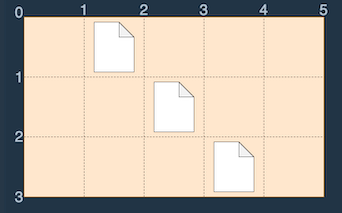

- 이러한 바탕화면에서 다음 그림과 같이 S(0, 1)에서 E(3, 4)로 드래그하면 세 개의 파일이 모두 선택되므로 드래그 한 거리 (3 - 0) + (4 - 1) = 6을 최솟값으로 모든 파일을 선택 가능합니다.

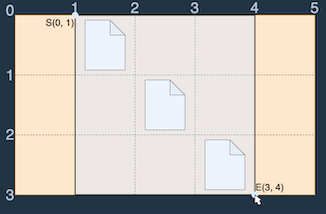

- (0, 0)에서 (3, 5)로 드래그해도 모든 파일을 선택할 수 있지만 이때 드래그 한 거리는 (3 - 0) + (5 - 0) = 8이고 이전의 방법보다 거리가 늘어납니다.

- 머쓱이의 컴퓨터 바탕화면의 상태를 나타내는 문자열 배열 `wallpaper`가 매개변수로 주어질 때 바탕화면의 파일들을 한 번에 삭제하기 위해 최소한의 이동거리를 갖는 드래그의 시작점과 끝점을 담은 정수 배열을 return하는 `solution` 함수를 작성해 주세요. 드래그의 시작점이 (`lux`, `luy`), 끝점이 (`rdx`, `rdy`)라면 정수 배열 `[lux, luy, rdx, rdy]`를 return하면 됩니다.

## 제한사항
- 1 ≤ `wallpaper`의 길이 ≤ 50
- 1 ≤ `wallpaper[i]`의 길이 ≤ 50
    - `wallpaper`의 모든 원소의 길이는 동일합니다.
- `wallpaper[i][j]`는 바탕화면에서 `i + 1`행 `j + 1`열에 해당하는 칸의 상태를 나타냅니다.
- `wallpaper[i][j]`는 "#" 또는 "."의 값만 가집니다.
- 바탕화면에는 적어도 하나의 파일이 있습니다.
- 드래그 시작점 (`lux`, `luy`)와 끝점 (`rdx`, `rdy`)는 `lux` < `rdx`, `luy` < `rdy`를 만족해야 합니다.

In [55]:
wallpaper = ["..........", ".....#....", "......##..", "...##.....", "....#....."]

In [56]:
wallpaper1 = [".#...", "..#..", "...#."]

In [57]:
wallpaper2 = [".##...##.", "#..#.#..#", "#...#...#", ".#.....#.", "..#...#..", "...#.#...", "....#...."]

In [58]:
def solution(wallpaper):
    
    # 시작지점의 x,y point와
    # 끝지점의 x,y point를 각각 변수를 만들어 할당한다.
    s_y_point = len(wallpaper) # 시작지점의 x와 y에는 가장 끝 지점의 좌표를 입력
    s_x_point = len(wallpaper[0])
    e_y_point = 0 # 끝지점의 x와 y에는 0을 입력
    e_x_point = 0
    
    # 이중 포문으로 각 요소를 하나하나 살펴본다.
    for i in range(len(wallpaper)):
        for j in range(len(wallpaper[i])):
            
            # 만약 wallpaper[i][j]가 '#'이고 i가 s_y_point보다 작으면 
            if (wallpaper[i][j] == '#') and (i < s_y_point):
                # s_y_point에 i를 저장
                s_y_point = i
            # 만약 wallpaper[i][j]가 '#'이고 j가 s_x_point보다 작으면
            if (wallpaper[i][j] == '#') and (j < s_x_point):
                # s_x_point에 j를 저장
                s_x_point = j
            # 만약 wallpaper[i][j]가 '#'이고 i가 e_y_point보다 크면
            if (wallpaper[i][j] == '#') and (i > e_y_point):
                # e_y_point에 i를 저장
                e_y_point = i
            # 만약 wallpaper[i][j]가 '#'이고 j가 e_y_point보다 크면
            if (wallpaper[i][j] == '#') and (j > e_x_point):
                # e_x_point에 j를 저장
                e_x_point = j
    return [s_y_point, s_x_point, e_y_point+1,e_x_point+1]

In [59]:
print(solution(wallpaper))
print(solution(wallpaper1))
print(solution(wallpaper2))

[1, 3, 5, 8]
[0, 1, 3, 4]
[0, 0, 7, 9]


## 다른 사람의 풀이

In [60]:
def solution(wall):
    
    # a와 b라는 빈 리스트를 만든다.
    a, b = [], []
    
    # wall안에있는 모든 문자열요소를 하나하나 살펴본다.
    for i in range(len(wall)):
        for j in range(len(wall[i])):
            
            # 만약 wall[i][j]가 '#'이면
            if wall[i][j] == "#":
                # 그 때의 i값을 a에 마지막 요소로 넣고
                a.append(i)
                # 그 때의 j값을 b에 마지막 요소로 넣는다.
                b.append(j)
    # 그리고 a의 최소값, b의 최소값, a의 최대값+1, b의 최대값 +1을 반환한다.
    return [min(a), min(b), max(a) + 1, max(b) + 1]

In [61]:
print(solution(wallpaper))
print(solution(wallpaper1))
print(solution(wallpaper2))

[1, 3, 5, 8]
[0, 1, 3, 4]
[0, 0, 7, 9]
